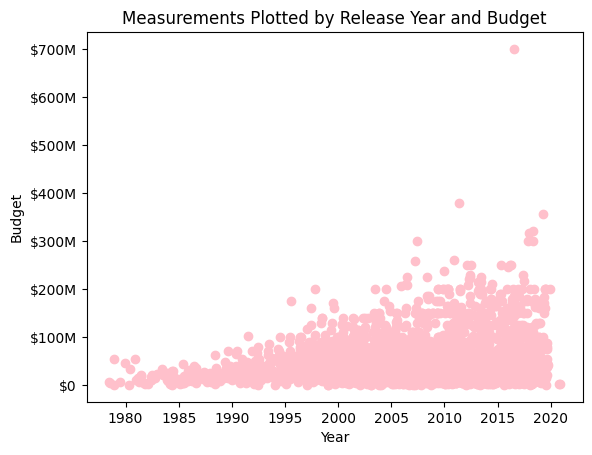

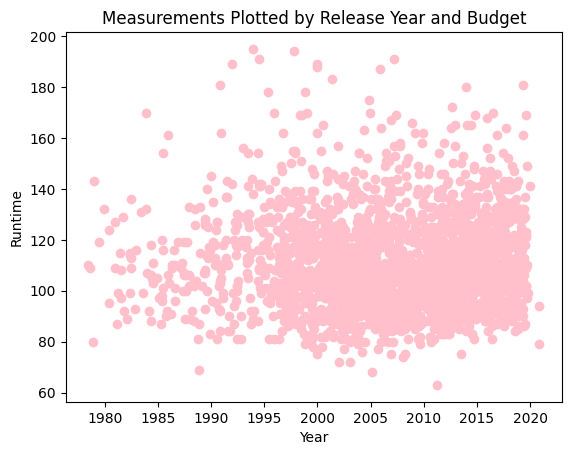

In [20]:
#Credit to Professor Ted Spencer for the code

import json

# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('C:\\Users\\amann\\Desktop\\Bellevue College\\Spring 2023\\DA320\\Week 06\\Secrets.json') as f:
    data = json.load(f)


    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
    secret_key = data ['mongodb_info']


#---------

import pymongo #this library is to connect mongodb to python
import certifi

# Once you have retrieved your connection string from a secrets file, use it here
# this is used to establish a connection between python through jupyter notebooks & mongodb, by using the library 'pymongo'


# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())


# Fetch the database named "DA320"
da320_database = client['DA320_Week05']
# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()


#------------------

#This part is to create the Year & Budget plotted graph

from matplotlib import pyplot # this library plots graphs
import pandas


# Select the desired database and collection
collection = da320_database["superhero_movies_load"]


# Retrieve data from the collection and convert it to a Pandas DataFrame
data = list(collection.find())
dataframe = pandas.DataFrame(data)


# Transform and standardize the columns using Pandas
dataframe['release_date'] = pandas.to_datetime(dataframe['release_date'], errors='coerce')
dataframe['budget'] = pandas.to_numeric(dataframe['budget'], errors='coerce')


#Formatting the Currency for the Y axis
def format_currency(amount, _):
    if amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
    

# Plot release date by budget
pyplot.title('Measurements Plotted by Release Year and Budget')
pyplot.xlabel('Year')
pyplot.ylabel('Budget')
pyplot.scatter(dataframe['release_date'], dataframe['budget'], color=['pink'])


# To display the currency format
pyplot.gca().yaxis.set_major_formatter(format_currency)


#to display the graph
pyplot.show()

#----------
#This part is to create the Year & Runtime plotted graph

#To transform the runtime of the movie into a number
dataframe['budget'] = pandas.to_numeric(dataframe['runtime'], errors='coerce')


#Formatting the Runtime for the Y axis
def time(period, _):
    if period>0:
        return f"{round(period)}"
    elif period>60:
        return f"{round(period)}"
    elif period>120:
        return f"{round(period)}"
    

# Plot release date by runtime
pyplot.title('Measurements Plotted by Release Year and Budget')
pyplot.xlabel('Year')
pyplot.ylabel('Runtime')
pyplot.scatter(dataframe['release_date'], dataframe['runtime'], color=['pink'])


#To set the formatter for the runtime in Y axis
pyplot.gca().yaxis.set_major_formatter(time)


#To display the graph
pyplot.show()


1) In the year & budget graph, there's the movie (Sultan) whose budget is almost $700 million dollars which seems odd because why would a movie cost so much, but it turns out that the movie is probably in a foreign currency and not dollars so that's why it is considered an outlier. This can be fixed by converting it into dollars. You can find the outliet by using {budget: {$gt: 500000000}} in MongoDB Compass

2) In the year & runtime graph, there seems like there's not a lot of outliers as much of the movies that are scattered away from the rest are less than 200 minutes and shouldn't cause a problem.